In [1]:
import numpy as np # Library that provides functions for mathematical operations and handling arrays
import pandas as pd # Libaray that provides a data frame class and functions to manipulate data frames
import geopandas as gpd # Library that helps to work with spatial data
import matplotlib.pyplot as plt # Function for 2D plotting
from mpl_toolkits.axes_grid1 import make_axes_locatable # Function to create a new axis on a plot
import contextily as cx # Library that helps to add OSM base layer to plots

import plotly.express as px # Library for interactive plotting
# Libraries to allow plotly to be offline and show plots in a jupyter notebook
import plotly.io as pio
import plotly.graph_objects as go
import cufflinks as cf
cf.go_offline ()
import rasterio # Library for raster data processing
from rasterio import plot as rioplot # Function to plot raster data
from rasterio . mask import mask # Function to mask raster data using shapefile for zonal statistics

# linearmodels library provides helps to perform regressions
from linearmodels import PooledOLS # Function to perform pooled OLS regression
from linearmodels import PanelOLS # Function to perform OLS regression on panel data
from linearmodels import BetweenOLS # Function to compute the between estimator of an OLS regression
from linearmodels . panel . results import compare # Function compare results of an OLS regression
import inequality # Library that provides methods for measuring inequality

In [2]:
import numpy as np  # Library that provides functions for mathematical operations and handling arrays
import pandas as pd  # Libaray that provides a data frame class and functions to manipulate data frames
import geopandas as gpd  # Library that helps working with spatial data


import matplotlib.pyplot as plt  # Function for 2D plotting
from matplotlib.gridspec import GridSpec
from mpl_toolkits.axes_grid1 import (
    make_axes_locatable,
)  # Function to create a new axis on a plot

import contextily as cx  # Library that helps adding OSM base layer to plots.

import plotly.express as px  # Library for interactive plotting

# Libraries to allow plotly to be offline and show plots in a jupyter notebook
import plotly.io as pio
import plotly.graph_objects as go
import plotly.express as px # Library for interactive plotting

import cufflinks as cf

cf.go_offline()

import rasterio  # Library for raster data processing
from rasterio import plot as rioplot  # Function to plot raster data
from rasterio.mask import (
    mask,
)  # Function for masking raster data using shapefile for zonal statistics


# linearmodels library provides helps performing regressions
from linearmodels import PooledOLS  # Function to perform pooled OLS regression
from linearmodels import PanelOLS  # Function to perform OLS regression on panel data
from linearmodels import (
    BetweenOLS,
)  # Function to compute the between estimator of an OLS regression
from linearmodels.panel.results import (
    compare,
)  # Function compare results of an OLS regression


import inequality  # Library that provides methods for measuring spatial inequality

from IPython.display import display, Markdown
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

import os
import zipfile
import requests
import glob
from io import BytesIO

### For this project, we use three datasets: 
### a) Satellite nighttime light images; 
### b) Subnational income per capita; and 
### c) Administrative boundaries for the states of India.

# Processing satellite night time images

### Herein, we shall be working on the “Visible Infrared Imaging Radiometer Suite” (VIIRS) sensor dataset with superior measurement capabilities. 

# Importing and visualizing satellite images

### To analyze the given datset ---
### First, we define a start and end year as global variables. 
### This definition restricts the study to a particular time frame, enabling us to focus on the period of interest 
### and optimizing computation time.

### rasterio library is used to load the NTL images of the world for the start and end years. 
### Thereafter the bounding box of the vector file to crop the image specifically to India will be employed.

In [3]:
# Defining start and end years
START_YEAR  = 2014
END_YEAR  = 2021

RASTER_DIRECTORY = "E:/Projects/Projects - Loyal Analytics/data/raster/"
RASTER_DIRECTORY

'E:/Projects/Projects - Loyal Analytics/data/raster/'

### As part of the 2nd step, we load the vector file containing the borders of Indian states using geopandas library.
### The given file is loaded into a GeoDataFrame, which has a column that contains geometric information in the form of polygons. 

### From the given vector file, the bounding box of the vector file, which contains the latitude and longitude extent 
### of India is extracted. This allows us to crop the NTL images to values purely for pursuance our region of interest  


In [4]:
india_composite = gpd.read_file('E:/Projects/Projects - Loyal Analytics/india-composite.geojson')
india_composite

geometry
0  MULTIPOLYGON (((77.51873 35.48566, 77.51874 35...

In [5]:
indian_map = gpd.read_file('E:/Projects/Projects - Loyal Analytics/in.json')
indian_map

source    id                                      name  \
0   https://simplemaps.com  INAN                       Andaman and Nicobar   
1   https://simplemaps.com  INTG                                 Telangana   
2   https://simplemaps.com  INAP                            Andhra Pradesh   
3   https://simplemaps.com  INAR                         Arunachal Pradesh   
4   https://simplemaps.com  INAS                                     Assam   
5   https://simplemaps.com  INBR                                     Bihar   
6   https://simplemaps.com  INCH                                Chandigarh   
7   https://simplemaps.com  INCT                              Chhattisgarh   
8   https://simplemaps.com  INDH  Dādra and Nagar Haveli and Damān and Diu   
9   https://simplemaps.com  INDL                                     Delhi   
10  https://simplemaps.com  INGA                                       Goa   
11  https://simplemaps.com  INGJ                                   Gujarat   
12  https://simplemaps.com  INHR                                   Haryana   
13  https://simplemaps.com  INHP                          Himachal Pradesh   
14  https://simplemaps.com  INJH                                 Jharkhand   
15  https://simplemaps.com  INKA                                 Karnataka   
16  https://simplemaps.com  INKL                                    Kerala   
17  https://simplemaps.com  INMP                            Madhya Pradesh   
18  https://simplemaps.com  INMH                               Maharashtra   
19  https://simplemaps.com  INMN                                   Manipur   
20  https://simplemaps.com  INML                                 Meghalaya   
21  https://simplemaps.com  INMZ                                   Mizoram   
22  https://simplemaps.com  INNL                                  Nagaland   
23  https://simplemaps.com  INOR                                    Orissa   
24  https://simplemaps.com  INPY                                Puducherry   
25  https://simplemaps.com  INPB                                    Punjab   
26  https://simplemaps.com  INRJ                                 Rajasthan   
27  https://simplemaps.com  INSK                                    Sikkim   
28  https://simplemaps.com  INTN                                Tamil Nadu   
29  https://simplemaps.com  INTR                                   Tripura   
30  https://simplemaps.com  INUP                             Uttar Pradesh   
31  https://simplemaps.com  INUT                               Uttaranchal   
32  https://simplemaps.com  INWB                               West Bengal   
33  https://simplemaps.com  INLD                               Lakshadweep   
34  https://simplemaps.com  INJK                         Jammu and Kashmir   
35  https://simplemaps.com  INLA                                    Ladakh   

                                             geometry  
0   MULTIPOLYGON (((93.84805 7.24028, 93.84250 7.2...  
1   POLYGON ((77.50945 15.92086, 77.51488 15.96315...  
2   MULTIPOLYGON (((77.50945 15.92086, 77.58842 15...  
3   POLYGON ((95.23763 26.68629, 95.23611 26.71221...  
4   MULTIPOLYGON (((92.10789 26.89382, 92.12037 26...  
5   POLYGON ((88.10615 26.53562, 88.13218 26.51258...  
6   POLYGON ((76.82819 30.76379, 76.82481 30.73082...  
7   POLYGON ((81.38497 17.80659, 81.31506 17.81234...  
8   MULTIPOLYGON (((73.21632 20.12200, 73.21774 20...  
9   POLYGON ((77.33774 28.50897, 77.32899 28.50832...  
10  POLYGON ((74.12603 15.65029, 74.14278 15.64711...  
11  MULTIPOLYGON (((73.21632 20.12200, 73.21095 20...  
12  POLYGON ((76.81981 30.68583, 76.82111 30.69678...  
13  MULTIPOLYGON (((77.57489 30.38452, 77.54289 30...  
14  POLYGON ((83.49817 24.52706, 83.54244 24.52618...  
15  POLYGON ((77.54996 18.29135, 77.57066 18.29047...  
16  MULTIPOLYGON (((74.86708 12.75445, 74.88560 12...  
17  POLYGON ((82.80778 23.96306, 82.79681 23.96142...  
18  POLYGON ((80.26754 18.71797, 80.24667 18.70132...  
19  POLYGON (

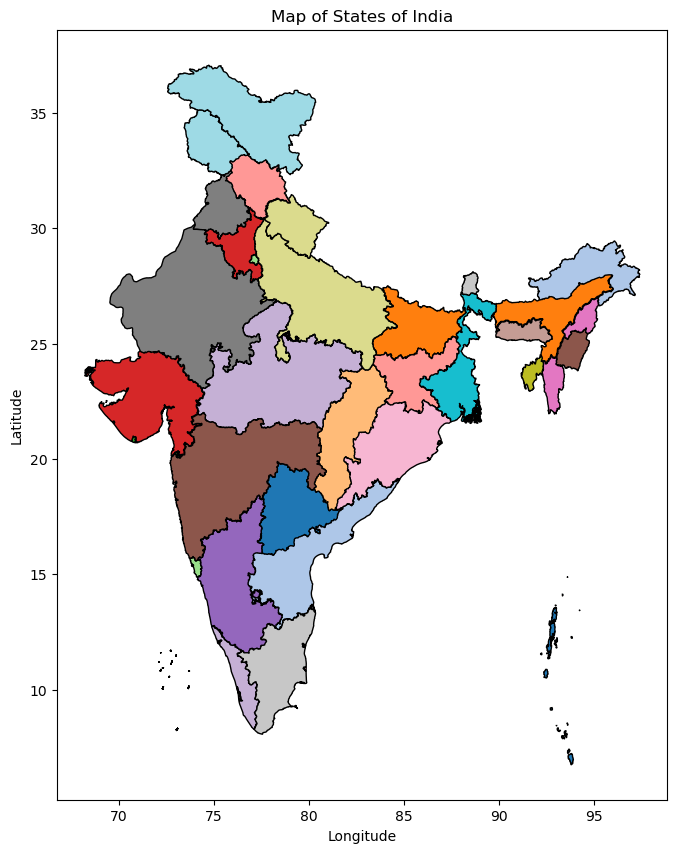

In [5]:
# Plot map for States of India with different colors for each state
fig, ax = plt.subplots(figsize=(10, 10))

# Generate a unique color for each state based on its index
num_states = len(indian_map)
colors = plt.cm.get_cmap('tab20', num_states)

for i, color in enumerate(colors(range(num_states))):
    indian_map[indian_map.index == i].plot(ax=ax, color=color, edgecolor='black')

ax.set_title('Map of States of India')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

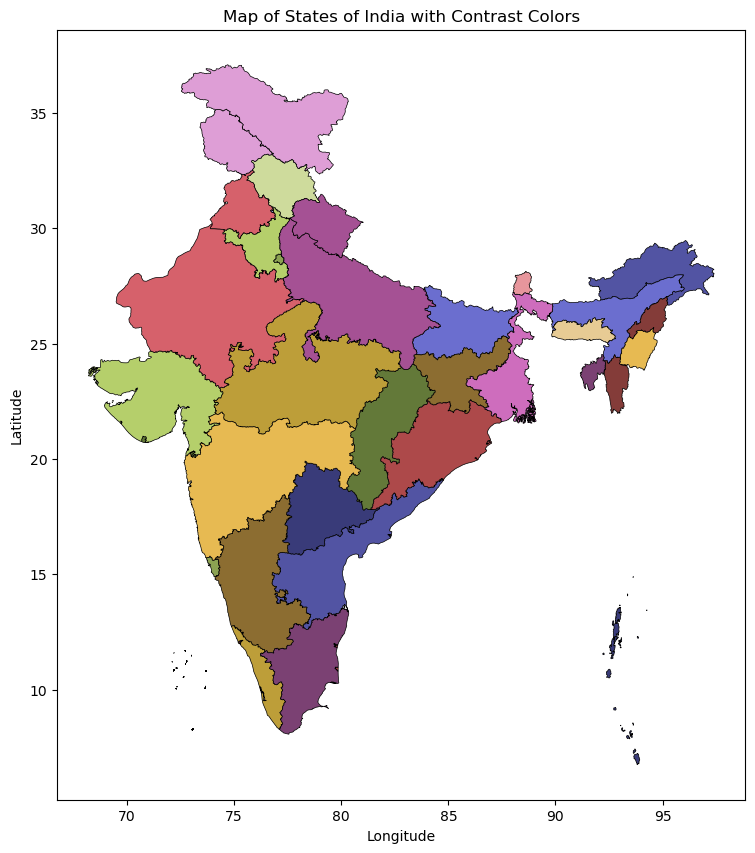

In [6]:
# Plot map for States of India with different colors for adjacent states
fig, ax = plt.subplots(figsize=(10, 10))
indian_map.plot(ax=ax, edgecolor='black', linewidth=0.5, cmap='tab20b')
ax.set_title('Map of States of India with Contrast Colors')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [13]:
# states = gpd.read_file('E:/Projects/Projects - Loyal Analytics/india_state.geojson')
# states

In [6]:
districts = gpd.read_file('E:/Projects/Projects - Loyal Analytics/india_district.geojson')
districts

ID_0  ISO NAME_0  ID_1               NAME_1  ID_2             NAME_2  \
0     105  IND  India     1  Andaman and Nicobar     1    Andaman Islands   
1     105  IND  India     1  Andaman and Nicobar     2    Nicobar Islands   
2     105  IND  India     2       Andhra Pradesh     3           Adilabad   
3     105  IND  India     2       Andhra Pradesh     4          Anantapur   
4     105  IND  India     2       Andhra Pradesh     5           Chittoor   
..    ...  ...    ...   ...                  ...   ...                ...   
589   105  IND  India    35          West Bengal   590  North 24 Parganas   
590   105  IND  India    35          West Bengal   591           Puruliya   
591   105  IND  India    35          West Bengal   592  South 24 Parganas   
592   105  IND  India    35          West Bengal   593     Uttar Dinajpur   
593   105  IND  India    35          West Bengal   594     West Midnapore   

    NL_NAME_2             VARNAME_2    TYPE_2 ENGTYPE_2  \
0        None                  None  District  District   
1        None                  None  District  District   
2        None                  None  District  District   
3        None  Anantpur, Ananthapur  District  District   
4        None       Chitoor|Chittor  District  District   
..        ...                   ...       ...       ...   
589      None                  None  District  District   
590      None                  None  District  District   
591      None                  None  District  District   
592      None                  None  District  District   
593      None     Paschim Medinipur  District  District   

                                              geometry  
0    MULTIPOLYGON (((92.51583 10.89764, 92.51611 10...  
1    MULTIPOLYGON (((93.78773 6.85264, 93.78849 6.8...  
2    POLYGON ((78.33625 19.88319, 78.34669 19.88140...  
3    POLYGON ((77.69000 15.17628, 77.69378 15.17347...  
4    POLYGON ((78.47611 13.93680, 78.48208 13.93007...  
..                                                 ...  
589  MULTIPOLYGON (((88.83472 21.60722, 88.83500 21...  
590  POLYGON ((86.89407 23.63799, 86.88847 23.62729...  
591  MULTIPOLYGON (((88.01861 21.57278, 88.01889 21...  
592  MULTIPOLYGON (((88.45847 25.59628, 88.45979 25...  
593  POLYGON ((87.42143 22.92110, 87.44063 22.91789...  

[594 rows x 12 columns]

In [7]:
taluka = gpd.read_file('E:/Projects/Projects - Loyal Analytics/india_taluk.geojson')
taluka

ID_0  ISO NAME_0  ID_1        NAME_1  ID_2             NAME_2  ID_3  \
0      105  IND  India     7  Chhattisgarh   110           Kawardha   334   
1      105  IND  India     7  Chhattisgarh   110           Kawardha   335   
2      105  IND  India     7  Chhattisgarh   111              Korba   336   
3      105  IND  India     7  Chhattisgarh   111              Korba   337   
4      105  IND  India     7  Chhattisgarh   112             Koriya   338   
...    ...  ...    ...   ...           ...   ...                ...   ...   
2294   105  IND  India    35   West Bengal   592  South 24 Parganas  2293   
2295   105  IND  India    35   West Bengal   592  South 24 Parganas  2294   
2296   105  IND  India    35   West Bengal   593     Uttar Dinajpur  2295   
2297   105  IND  India    35   West Bengal   593     Uttar Dinajpur  2296   
2298   105  IND  India    35   West Bengal   594     West Midnapore  2297   

            NAME_3 NL_NAME_3 VARNAME_3 TYPE_3 ENGTYPE_3  \
0         Kawardha      None      None  Taluk     Taluk   
1         Pandaria      None      None  Taluk     Taluk   
2         Katghora      None      None  Taluk     Taluk   
3            Korba      None      None  Taluk     Taluk   
4      Baikunthpur      None      None  Taluk     Taluk   
...            ...       ...       ...    ...       ...   
2294  n.a. ( 1187)      None      None  Taluk     Taluk   
2295  n.a. ( 1229)      None      None  Taluk     Taluk   
2296      Islampur      None      None  Taluk     Taluk   
2297       Raiganj      None      None  Taluk     Taluk   
2298        Ghatal      None      None  Taluk     Taluk   

                                               geometry  
0     POLYGON ((81.19419 22.46208, 81.19308 22.45114...  
1     POLYGON ((81.47986 22.49331, 81.48182 22.48764...  
2     POLYGON ((82.56844 22.96502, 82.56003 22.96093...  
3     POLYGON ((82.82744 22.74267, 82.84205 22.74336...  
4     POLYGON ((82.49175 23.78571, 82.49255 23.77529...  
...                                                 ...  
2294  MULTIPOLYGON (((88.65997 22.01921, 88.66050 22...  
2295  MULTIPOLYGON (((88.49771 21.59975, 88.49830 21...  
2296  POLYGON ((88.33715 26.49714, 88.33586 26.49557...  
2297  MULTIPOLYGON (((88.45847 25.59628, 88.45979 25...  
2298  POLYGON ((87.85115 22.59397, 87.85471 22.58538...  

[2299 rows x 14 columns]

E:\Anaconda\lib\site-packages\contextily\tile.py:623: UserWarning:

The inferred zoom level of 22 is not valid for the current tile provider (valid zooms: 0 - 19).



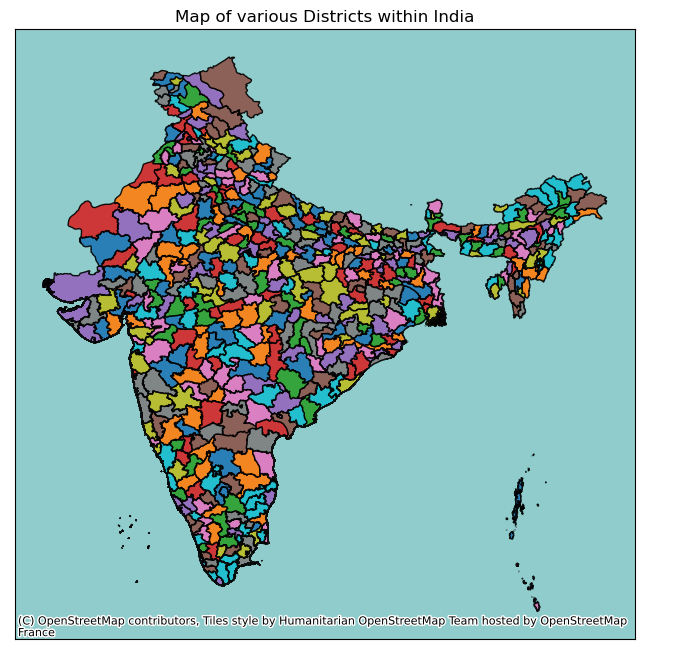

In [8]:
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

# Assuming you have a GeoDataFrame named 'districts'
# Create or load the GeoDataFrame 'districts' first

# Then, plot the GeoDataFrame 'districts' on a Matplotlib Axes object
ax = districts.plot(column='NAME_2', figsize=(8, 8), alpha=0.9, edgecolor='k', legend=False)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

# Add a basemap to the plot
ctx.add_basemap(ax)

# Add a title
plt.title('Map of various Districts within India')

# Show the plot
plt.show()

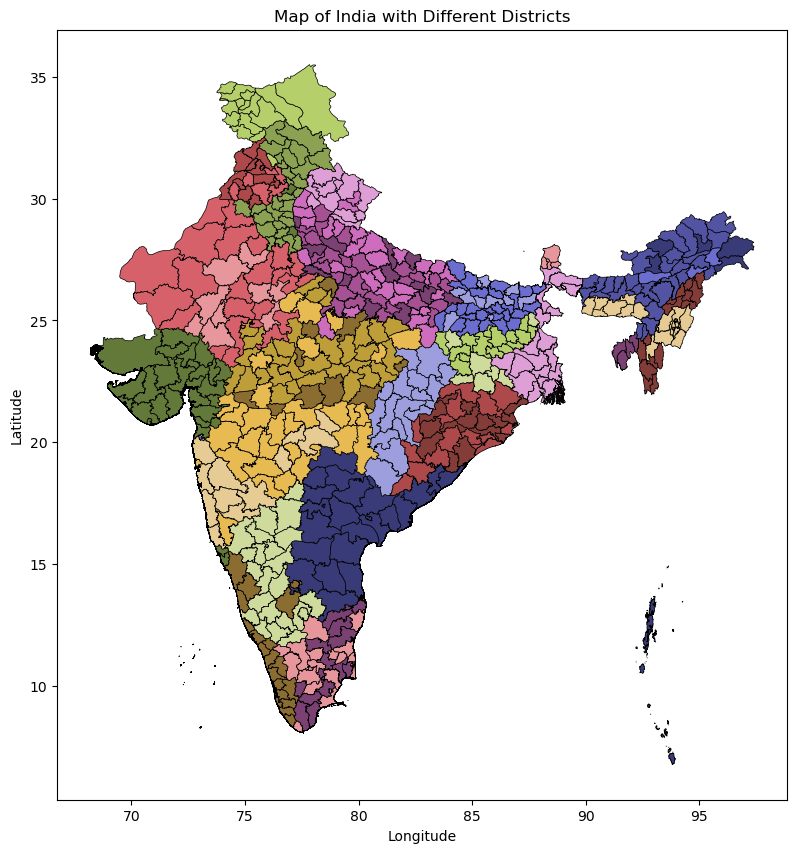

In [7]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Read the GeoJSON file containing district boundaries
districts_geojson = 'E:/Projects/Projects - Loyal Analytics/india_district.geojson'  # Replace 'path_to_districts_geojson_file.geojson' with the actual file path
districts = gpd.read_file(districts_geojson)

# Plot map for India with different districts
fig, ax = plt.subplots(figsize=(10, 10))
districts.plot(ax=ax, edgecolor='black', linewidth=0.5, cmap='tab20b')
ax.set_title('Map of India with Different Districts')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

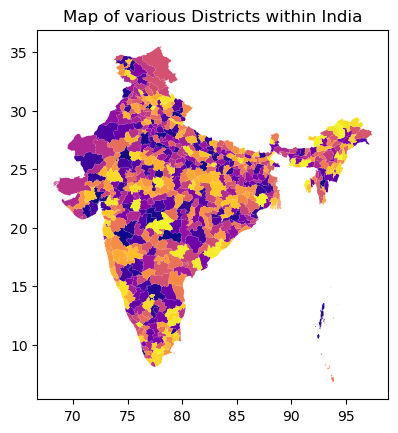

In [23]:
# Plot the map
# districts.plot()

# Plot the map with different colors based on a specific attribute
districts.plot(column='NAME_2', cmap='plasma', legend=False)

# Add a title
plt.title('Map of various Districts within India')

# Show the plot
plt.show()

E:\Anaconda\lib\site-packages\contextily\tile.py:623: UserWarning:

The inferred zoom level of 22 is not valid for the current tile provider (valid zooms: 0 - 19).



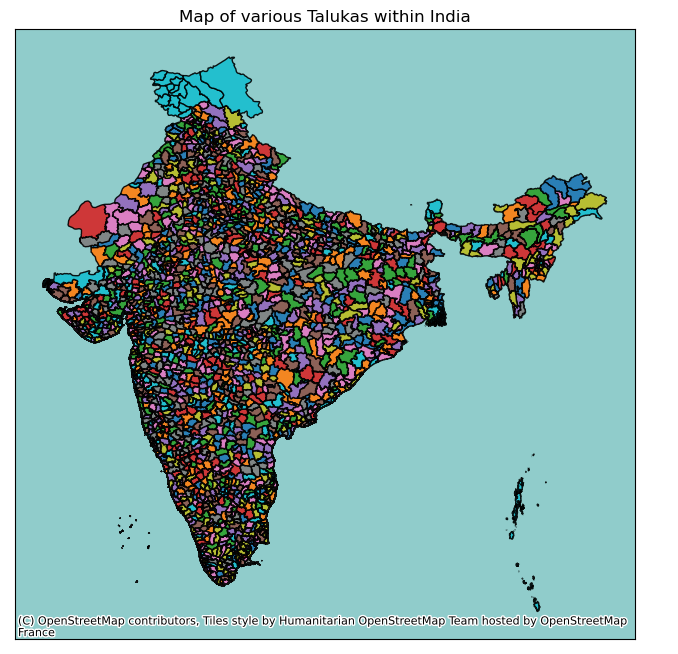

In [17]:
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

# Assuming you have a GeoDataFrame named 'talukas'
# Create or load the GeoDataFrame 'talukas' first

# Then, plot the GeoDataFrame 'talukas' on a Matplotlib Axes object
ax = taluka.plot(column='NAME_3', figsize=(8, 8), alpha=0.9, edgecolor='k', legend=False)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

# Add a basemap to the plot
ctx.add_basemap(ax)

# Add a title
plt.title('Map of various Talukas within India')

# Show the plot
plt.show()

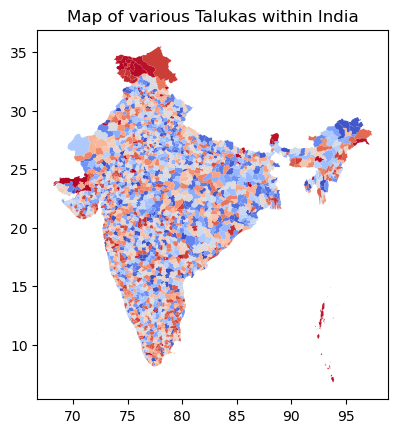

In [12]:
# Plot the map
# taluka.plot()

# Plot the map with different colors based on a specific attribute
taluka.plot(column='NAME_3', cmap='coolwarm', legend=False)

# Add a title
plt.title('Map of various Talukas within India')

# Show the plot
plt.show()

In [9]:
# Extract the bounding box of the loaded vector file
polygons_files_bbox_states = indian_map.total_bounds
polygons_files_bbox_states

array([68.18624879,  6.75425581, 97.41162873, 37.07826815])

In [10]:
# Extract the bounding box of the loaded vector file
polygons_files_bbox_districts = districts.total_bounds
polygons_files_bbox_districts

array([68.18624878,  6.75425577, 97.41516113, 35.50133133])

In [11]:
# Extract the bounding box of the loaded vector file
polygons_files_bbox_talukas = taluka.total_bounds
polygons_files_bbox_talukas

array([68.18624878,  6.75425577, 97.41516113, 35.50133133])

In [14]:
# Define the URL of the zip file
# url = "https://figshare.com/ndownloader/articles/9828827/versions/7"

# Send an HTTP GET request to the URL
# response = requests.get(url)

# Check if the request was successful (status code 200)
# if response.status_code == 200:
    # Read the content of the response as bytes
    # zip_content = BytesIO(response.content)

    # Extract the zip file
    # with zipfile.ZipFile(zip_content, 'r') as zip_ref:
        # You can list the files in the zip file if needed
        # zip_ref.printdir()

        # Extract the files to a directory (e.g., 'my_extracted_files/')
        # zip_ref.extractall('E:/Projects/Projects - Loyal Analytics/data/raster/')
        
    # print("Zip file has been successfully extracted.")
# else:
    # print("Failed to retrieve the zip file. Check the URL and your internet connection.")

File Name                                             Modified             Size
Harmonized_DN_NTL_2008_calDMSP.tif             2024-04-07 15:06:08     36364284
Harmonized_DN_NTL_2009_calDMSP.tif             2024-04-07 15:06:08     34842068
Harmonized_DN_NTL_2010_calDMSP.tif             2024-04-07 15:06:08     38841372
Harmonized_DN_NTL_2011_calDMSP.tif             2024-04-07 15:06:08     38809934
Harmonized_DN_NTL_2012_calDMSP.tif             2024-04-07 15:06:08     38196812
Harmonized_DN_NTL_2013_calDMSP.tif             2024-04-07 15:06:08     37969756
Harmonized_DN_NTL_2014_simVIIRS.tif            2024-04-07 15:06:08     42929043
Harmonized_DN_NTL_2015_simVIIRS.tif            2024-04-07 15:06:08     47642237
Harmonized_DN_NTL_2016_simVIIRS.tif            2024-04-07 15:06:08     45119451
Harmonized_DN_NTL_2017_simVIIRS.tif            2024-04-07 15:06:08     50047769
Harmonized_DN_NTL_2018_simVIIRS.tif            2024-04-07 15:06:08     48354597
Harmonized_DN_NTL_1992_calDMSP.tif      

In [15]:
# def load_raster(year):
    """
    Load a raster file based on the provided time identifier.

    Parameters:
    -----------
    year : str

    Returns:
    --------
    rasterio.io.DatasetReader
    An opened raster file dataset ready for further operations.

    Example:
    --------
    >>> raster_2014 = load_raster("2014")
    >>> type(raster_2014)
    <class 'rasterio.io.DatasetReader'>

    Notes:
    ------
    Modify the path in the function if your file structure 
    or naming convention differs.
    """
    
#    raster_2014 = load_raster("2014")
#    type(raster_2014)
#    raster_path = f"{RASTER_DIRECTORY}/Harmonized_DN_NTL_{year}*"
#    return (rasterio.open(glob.glob(raster_path)[0]))

In [12]:
import rasterio
import glob

RASTER_DIRECTORY = "E:/Projects/Projects - Loyal Analytics/data/raster"

def load_raster(year):
    raster_path = f"{RASTER_DIRECTORY}/Harmonized_DN_NTL_{year}*"
    return rasterio.open(glob.glob(raster_path)[0])

# Define a list to store raster datasets for each year
raster_datasets = []

# Loop through each year from 2014 to 2023
for year in range(2014, 2022):
    raster_dataset = load_raster(str(year))  # Convert year to string
    raster_datasets.append(raster_dataset)
    
# Now raster_datasets contains the raster datasets for each year from 2014 to 2021
# You can access individual datasets using indexing, e.g., raster_datasets[0] for 2014


In [13]:
# The bounding box of the vector file previously loaded is extracted using the total_bounds property
# TO CHK----

polygons_files_bbox = indian_map.total_bounds
polygons_files_bbox

array([68.18624879,  6.75425581, 97.41162873, 37.07826815])

In [14]:
# The raster file corresponding to the start year is loaded using the open function in rasterio
raster_file_first = load_raster(START_YEAR)

# The bounding box of the vector data is used to crop the raster file
raster_file_window_first = raster_file_first.window(*polygons_files_bbox)
raster_file_clipped_first = raster_file_first.read(1, window=raster_file_window_first)

In [15]:
# The raster file corresponding to the end year is loaded using the open function in rasterio
raster_file_last = load_raster(END_YEAR)

# The bounding box of the vector data is used to crop the raster file
raster_file_window_last = raster_file_last.window(*polygons_files_bbox)
raster_file_clipped_last = raster_file_last.read(1, window=raster_file_window_last)

### As we overlay the cropped NTL images for the start and end years, we superimpose the state boundaries from the vector file. 

# Computing Zonal Statistics---

### To conduct a meaningful comparison between NTL and subnational GDP, we must adhere to the following steps:
### a) It is crucial to ensure that both datasets have the same geographic scale. 
### b) As subnational GDP data are available at the specific state level, we need to aggregate the NTL values accordingly. 
### c) This can be achieved through zonal statistics, wherein we can sum the amount of light for each state, thereby resulting in state-level nighttime lights data being generated. 

### Other statistical measures viz. Mean, median and other operators can also be used. 
### To accomplish such an aggregation, we initially load the NTL images for each year of interest or for the given business case-study
### Thereafter, a mask function is defined that can filter out all points outside the polygon in the raster file. 
### Lastly, we apply the mask function to each polygon in the vector file, resulting in the summation that generates state-level nighttime light data for each year. 

In [16]:
# A dataframe is initialised to store the results
gdf_NTL = indian_map.copy()

In [18]:
# Choose an operator for aggregation. In this notebook, the operator, AGGREGATE_OPERATOR, has been set to np.ma.sum. 
# Other operators can be chosen, for example, np.ma.mean and np.ma.median will compute the mean and median respectively. 
# The list of operators can be found here: https://numpy.org/doc/stable/reference/routines.ma.html
AGGREGATE_OPERATOR = np.ma.sum

# Define the clean_mask function outside the loop
def geom_mask(geom, dataset, crop=True, all_touched=True):
    masked, mask_transform = mask(dataset=dataset, shapes=(geom,), crop=crop, all_touched=all_touched)
    return masked

# A loop runs from the start year to the end year that computes the aggregate nighttime lights radiance for each state
for year in range(START_YEAR, END_YEAR + 1):
    # The raster file of the given year is loaded
    raster_file = load_raster(year)
    # The mask is applied, and then a summation is performed for computing the aggregate radiance.
    statewise_agg_ntl = indian_map.geometry.apply(geom_mask, dataset=raster_file).apply(AGGREGATE_OPERATOR)

    # The state-wise aggregate radiance of the year is stored in the data frame that was initialized earlier.
    gdf_NTL[str(year)] = statewise_agg_ntl

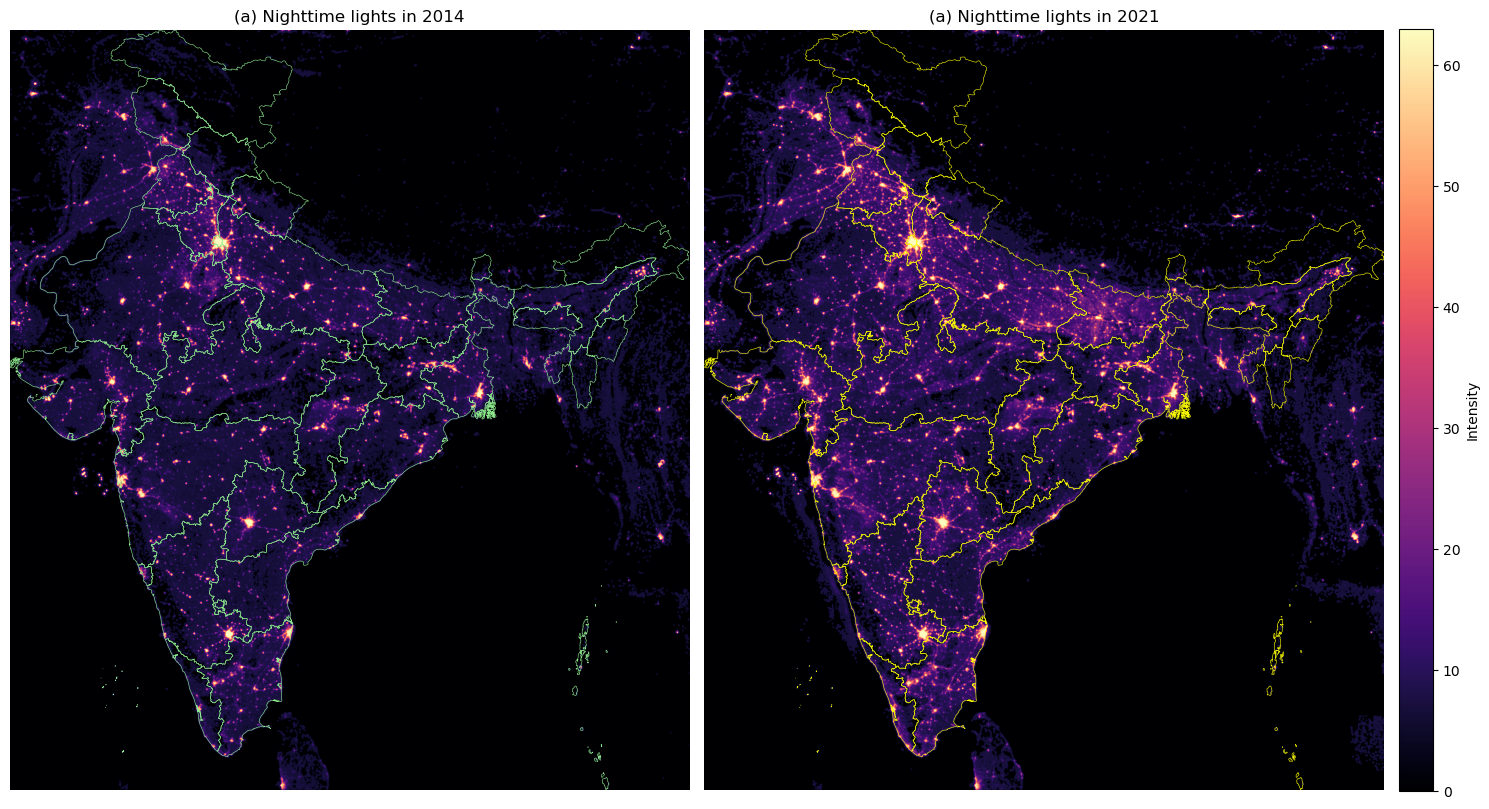

In [21]:
# Initialize the GridSpec for setting up the plot structure
gs = GridSpec(1, 3, width_ratios=[2,2, 0.1])

fig = plt.figure(figsize=(15, 8))
ax1 = fig.add_subplot(gs[0])

first_year_plot = ax1.imshow(
    raster_file_clipped_first,
    extent=polygons_files_bbox[[0, 2, 1, 3]],
    vmin=0,
    vmax=63,
    cmap="magma",
)
indian_map.boundary.plot(ax=ax1, color="lightgreen", linewidth=0.4)
ax1.set_title(f"(a) Nighttime lights in {START_YEAR}")
ax1.set_axis_off()

# cax1 = fig.add_subplot(gs[1])
ax2 = fig.add_subplot(gs[1])

last_year_plot = ax2.imshow(
    raster_file_clipped_last,
    extent=polygons_files_bbox[[0, 2, 1, 3]],
    vmin=0,
    vmax=63,
    cmap="magma",
)
indian_map.boundary.plot(ax=ax2, color="yellow", linewidth=0.4)
ax2.set_title(f"(a) Nighttime lights in {END_YEAR}")
ax2.set_axis_off()

cax2 = fig.add_subplot(gs[2])
# Add colorbar
fig.colorbar(first_year_plot, cax=cax2, label='Intensity')

plt.tight_layout()
# plt.savefig("figures/NTL.png", dpi=300, bbox_inches="tight")
plt.show()

### As expected, India exhibits a brighter appearance in the image for the end year in comparison to the start year.

### As the final step in the aggregation process, we obtain a GeoDataFrame in which each column represents the total sum of night-time lights for each state across all years.

### As part of the next step, a data frame containing summary statistics of state-level night-time lights based on yearly basis is created

In [22]:
# gdf_NTL now contains the aggregate radiance for each year.
gdf_NTL

source    id                                      name  \
0   https://simplemaps.com  INAN                       Andaman and Nicobar   
1   https://simplemaps.com  INTG                                 Telangana   
2   https://simplemaps.com  INAP                            Andhra Pradesh   
3   https://simplemaps.com  INAR                         Arunachal Pradesh   
4   https://simplemaps.com  INAS                                     Assam   
5   https://simplemaps.com  INBR                                     Bihar   
6   https://simplemaps.com  INCH                                Chandigarh   
7   https://simplemaps.com  INCT                              Chhattisgarh   
8   https://simplemaps.com  INDH  Dādra and Nagar Haveli and Damān and Diu   
9   https://simplemaps.com  INDL                                     Delhi   
10  https://simplemaps.com  INGA                                       Goa   
11  https://simplemaps.com  INGJ                                   Gujarat   
12  https://simplemaps.com  INHR                                   Haryana   
13  https://simplemaps.com  INHP                          Himachal Pradesh   
14  https://simplemaps.com  INJH                                 Jharkhand   
15  https://simplemaps.com  INKA                                 Karnataka   
16  https://simplemaps.com  INKL                                    Kerala   
17  https://simplemaps.com  INMP                            Madhya Pradesh   
18  https://simplemaps.com  INMH                               Maharashtra   
19  https://simplemaps.com  INMN                                   Manipur   
20  https://simplemaps.com  INML                                 Meghalaya   
21  https://simplemaps.com  INMZ                                   Mizoram   
22  https://simplemaps.com  INNL                                  Nagaland   
23  https://simplemaps.com  INOR                                    Orissa   
24  https://simplemaps.com  INPY                                Puducherry   
25  https://simplemaps.com  INPB                                    Punjab   
26  https://simplemaps.com  INRJ                                 Rajasthan   
27  https://simplemaps.com  INSK                                    Sikkim   
28  https://simplemaps.com  INTN                                Tamil Nadu   
29  https://simplemaps.com  INTR                                   Tripura   
30  https://simplemaps.com  INUP                             Uttar Pradesh   
31  https://simplemaps.com  INUT                               Uttaranchal   
32  https://simplemaps.com  INWB                               West Bengal   
33  https://simplemaps.com  INLD                               Lakshadweep   
34  https://simplemaps.com  INJK                         Jammu and Kashmir   
35  https://simplemaps.com  INLA                                    Ladakh   

                                             geometry     2014     2015  \
0   MULTIPOLYGON (((93.84805 7.24028, 93.84250 7.2...    18636    21359   
1   POLYGON ((77.50945 15.92086, 77.51488 15.96315...  1255385  1333209   
2   MULTIPOLYGON (((77.50945 15.92086, 77.58842 15...  1517461  1615956   
3   POLYGON ((95.23763 26.68629, 95.23611 26.71221...   120124   139318   
4   MULTIPOLYGON (((92.10789 26.89382, 92.12037 26...   746792   826849   
5   POLYGON ((88.10615 26.53562, 88.13218 26.51258...  1005929  1140513   
6   POLYGON ((76.82819 30.76379, 76.82481 30.73082...    11365    11459   
7   POLYGON ((81.38497 17.80659, 81.31506 17.81234...  1277299  1372193   
8   MULTIPOLYGON (((73.21632 20.12200, 73.21774 20...    29151    30510   
9   POLYGON ((77.33774 28.50897, 77.32899 28.50832...   123069   123739   
10  POLYGON ((74.12603 15.65029, 74.14278 15.64711...    58442    58985   
11  MULTIPOLYGON (((73.21632 20.12200, 73.21095 20...  1950256  2055751   
12  POLYGON ((76.81981 30.68583, 76.82111 30.69678...   976993   882221   
13  MULTIPOLYGON (((77.57489 30.38452, 77.54289 30...   276386   288187   
14  POLY

# Descriptive Statistics ---

In [23]:
# The summary statistics of aggregate nighttime lights is produced for each year
gdf_NTL.drop("geometry", axis=1).describe().round(2)

2014        2015        2016        2017        2018        2019  \
count       36.00       36.00       36.00       36.00       36.00       36.00   
mean    890167.25   938626.58   893037.36  1141966.36  1152569.81  1218341.75   
std    1005307.93  1055448.79  1042591.72  1250609.97  1266634.13  1339648.17   
min        818.00      853.00      838.00      903.00      903.00      944.00   
25%     121224.25   122316.00    90869.75   128885.25   137944.00   140202.75   
50%     487324.50   493213.50   483580.00   811198.50   804031.00   826425.50   
75%    1308780.75  1411937.25  1274996.25  1695645.25  1649148.50  1757227.75   
max    3450012.00  3593070.00  3566013.00  4488795.00  4513370.00  4680053.00   

             2020        2021  
count       36.00       36.00  
mean   1121816.61  1195308.69  
std    1307741.07  1375336.94  
min        491.00     1011.00  
25%     116060.25   132792.50  
50%     534375.50   590507.50  
75%    1702616.25  1884144.25  
max    4516622.00  4686115.00

### Thereafter, we need to export the results as a geojson file, ready for potential data analysis via other softwares

In [24]:
# Exporting to a geojson file---

# The aggregate nighttime lights radiance dataframe is saved to file.
gdf_NTL.to_file("E:/Projects/Projects - Loyal Analytics/gdf_NTL.geojson", driver="GeoJSON")

# Creating panel-data structures

### After having successfully aggregated the nighttime lights data to the state level in order to align with the resolution of the subnational GDP data, it is  now possible to create panel-data structures for both the datasets and merge them into a single dataset.

In [94]:
# State level nighttime lights data is read using geopandas
df_NTL = gpd.read_file("E:/Projects/Projects - Loyal Analytics/gdf_NTL.geojson").drop("geometry", axis=1)
df_NTL

source    id                                      name  \
0   https://simplemaps.com  INAN                       Andaman and Nicobar   
1   https://simplemaps.com  INTG                                 Telangana   
2   https://simplemaps.com  INAP                            Andhra Pradesh   
3   https://simplemaps.com  INAR                         Arunachal Pradesh   
4   https://simplemaps.com  INAS                                     Assam   
5   https://simplemaps.com  INBR                                     Bihar   
6   https://simplemaps.com  INCH                                Chandigarh   
7   https://simplemaps.com  INCT                              Chhattisgarh   
8   https://simplemaps.com  INDH  Dādra and Nagar Haveli and Damān and Diu   
9   https://simplemaps.com  INDL                                     Delhi   
10  https://simplemaps.com  INGA                                       Goa   
11  https://simplemaps.com  INGJ                                   Gujarat   
12  https://simplemaps.com  INHR                                   Haryana   
13  https://simplemaps.com  INHP                          Himachal Pradesh   
14  https://simplemaps.com  INJH                                 Jharkhand   
15  https://simplemaps.com  INKA                                 Karnataka   
16  https://simplemaps.com  INKL                                    Kerala   
17  https://simplemaps.com  INMP                            Madhya Pradesh   
18  https://simplemaps.com  INMH                               Maharashtra   
19  https://simplemaps.com  INMN                                   Manipur   
20  https://simplemaps.com  INML                                 Meghalaya   
21  https://simplemaps.com  INMZ                                   Mizoram   
22  https://simplemaps.com  INNL                                  Nagaland   
23  https://simplemaps.com  INOR                                    Orissa   
24  https://simplemaps.com  INPY                                Puducherry   
25  https://simplemaps.com  INPB                                    Punjab   
26  https://simplemaps.com  INRJ                                 Rajasthan   
27  https://simplemaps.com  INSK                                    Sikkim   
28  https://simplemaps.com  INTN                                Tamil Nadu   
29  https://simplemaps.com  INTR                                   Tripura   
30  https://simplemaps.com  INUP                             Uttar Pradesh   
31  https://simplemaps.com  INUT                               Uttaranchal   
32  https://simplemaps.com  INWB                               West Bengal   
33  https://simplemaps.com  INLD                               Lakshadweep   
34  https://simplemaps.com  INJK                         Jammu and Kashmir   
35  https://simplemaps.com  INLA                                    Ladakh   

       2014     2015     2016     2017     2018     2019     2020     2021  
0     18636    21359    17731    27481    29262    26714    19071    19547  
1   1255385  1333209  1246553  1434682  1523891  1605724  1649029  1785451  
2   1517461  1615956  1497008  1731289  1820215  1944865  1863378  1957345  
3    120124   139318    98248   233839   274035   183590   122201   149903  
4    746792   826849   695262   853273   865885   877370   854600   905263  
5   1005929  1140513  1211984  1456477  1566132  1851178  1982787  2032588  
6     11365    11459    11497    11577    11557    11727    11712    11809  
7   1277299  1372193  1204979  1571874  1600718  1654790  1433435  1613666  
8     29151    30510    29787    32246    33833    34714    33897    33410  
9    123069   123739   122626   123321   123229   125631   125314   125456  
10    58442    58985    59392    67526    72140    77922    72415    74957  
11  1950256  2055751  1988498  2370535  2444956  2572637  2493239  2656386  
12   976993   882221   832358   920891   938892  1039907  1050374  1110430  
13   276386   288187   274314   604439   591594   60532

In [95]:
df_NTL['name'].unique()

array(['Andaman and Nicobar', 'Telangana', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dādra and Nagar Haveli and Damān and Diu',
       'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
       'Orissa', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'Uttaranchal',
       'West Bengal', 'Lakshadweep', 'Jammu and Kashmir', 'Ladakh'],
      dtype=object)

In [96]:
# State level GDP data is loaded from a csv file
df_GDP = pd.read_csv("E:/Projects/Projects - Loyal Analytics/GSDP_Current_2011-12_State_wise.csv")
df_GDP

name        2014        2015        2016        2017  \
0             Andhra Pradesh    524975.64   604228.62   684415.87   786135.42   
1           Arunachal Pradesh    17959.41    18509.16    19902.12    22474.78   
2                       Assam   195723.15   227958.83   254382.36   283164.89   
3                       Bihar   342950.94   371601.79   421051.50   468746.31   
4                Chhattisgarh   221118.11   225162.99   262801.75   282283.44   
5                         Goa    47814.18    55053.85    62976.31    69352.05   
6                     Gujarat   921773.15  1029009.74  1167155.58  1329094.77   
7                     Haryana   437144.71   495504.11   561424.17   638832.08   
8            Himachal Pradesh   103772.32   114239.41   125633.64   138551.09   
9            Jammu & Kashmir*    98366.75   117167.95   124848.00   139708.86   
10                  Jharkhand   218525.17   206612.80   236249.72   269816.14   
11                  Karnataka   913923.03  1045168.10  1207607.72  1333240.00   
12                     Kerala   512564.05   561993.61   634886.40   701588.26   
13             Madhya Pradesh   479939.04   541067.51   649822.81   726283.92   
14                Maharashtra  1779137.93  1966224.58  2198185.15  2352781.50   
15                    Manipur    18129.05    19530.67    21293.89    25789.23   
16                  Meghalaya    23234.53    25117.36    27438.62    29508.30   
17                    Mizoram    13509.40    15138.86    17191.91    19385.33   
18                   Nagaland    18400.67    19523.95    21722.45    24392.96   
19                     Odisha   314249.95   328549.50   392803.67   440974.79   
20                     Punjab   355101.82   390087.44   426988.10   471013.61   
21                  Rajasthan   615641.56   681482.26   760587.27   832529.23   
22                     Sikkim    15406.72    18033.94    20687.19    25970.82   
23                 Tamil Nadu  1072677.97  1176500.03  1302638.58  1465050.91   
24                  Telangana   505848.79   577902.06   658325.34   750050.28   
25                    Tripura    29533.46    35937.73    39479.40    43715.80   
26              Uttar Pradesh  1011789.66  1137807.94  1288700.23  1439706.45   
27                Uttarakhand   161438.92   177163.02   195124.85   220222.13   
28                West Bengal   718081.66   797299.80   872527.23   974699.78   
29  Andaman & Nicobar Islands     5477.22     6031.73     6835.87     7890.41   
30                 Chandigarh    26548.56    29275.07    32426.66    36344.35   
31                      Delhi   494803.02   550803.70   616085.06   677900.04   
32       Jammu & Kashmir-U.T.        0.00        0.00        0.00        0.00   
33                 Puducherry    22573.96    26616.54    29572.66    32128.80   

          2018        2019        2020        2021  % Growth 2014  \
0    873721.11   966099.05  1014373.79  1201735.52          13.08   
1     25330.85    27884.63    29694.51         NaN          23.17   
2    309336.32   377404.81   381003.97   433925.44          10.11   
3    527975.82   594016.40   618628.16         NaN           8.15   
4    318101.13   344955.35   350269.83         NaN           6.91   
5     71853.34    74828.37    78337.92    85380.28          33.11   
6   1492155.71  1629638.12  1655916.77         NaN          14.13   
7    698188.88   762043.60   758506.53   895671.25           9.49   
8    148383.27   159161.70   156675.06   175173.31           9.51   
9    159859.45         NaN         NaN         NaN           2.87   
10   305695.20   321157.31   317078.73         NaN          15.89   
11  1476496.28  1615456.53  1730991.41  2049378.96          11.91   
12   788285.58   824374.20   799571.11   901997.83          10.22   
13   831023.88   938602.13   976281.48  1169003.88           9.21   
14  2567897.06  2734551.53  2711685.12         NaN           7.85   
15    27388.07    31297.02    34110.21         NaN          12.03   
16    32175.82  

In [98]:
df_GDP['name'].unique()

array(['Andhra Pradesh ', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu & Kashmir*', 'Jharkhand', 'Karnataka', 'Kerala',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal', 'Andaman & Nicobar Islands',
       'Chandigarh', 'Delhi', 'Jammu & Kashmir-U.T.', 'Puducherry'],
      dtype=object)

In [99]:
# Nighttime lights data is put in long form---

df2_NTL = pd.melt(
    df_NTL,
    id_vars=["name"],
    value_vars=[str(x) for x in range(START_YEAR , END_YEAR  + 1)],
)
df2_NTL.columns = ["name", "year", "NTL"]
df2_NTL

name  year      NTL
0    Andaman and Nicobar  2014    18636
1              Telangana  2014  1255385
2         Andhra Pradesh  2014  1517461
3      Arunachal Pradesh  2014   120124
4                  Assam  2014   746792
..                   ...   ...      ...
283          Uttaranchal  2021   565155
284          West Bengal  2021  1521852
285          Lakshadweep  2021     1011
286    Jammu and Kashmir  2021   615860
287               Ladakh  2021   135238

[288 rows x 3 columns]

In [100]:
df2_NTL.to_csv("E:/Projects/Projects - Loyal Analytics/df2_NTL.csv", index=False)

In [101]:
# Melt the GSDP columns
df_GSDP = pd.melt(
    df_GDP,
    id_vars=["name"],
    value_vars=[str(x) for x in range(START_YEAR, END_YEAR + 1)],
    var_name="year",
    value_name="GSDP"
)

# Melt the % Growth columns
df_growth = pd.melt(
    df_GDP,
    id_vars=["name"],
    value_vars=["% Growth " + str(x) for x in range(START_YEAR, END_YEAR + 1)], # Added a space after % Growth
    var_name="year",
    value_name="% Growth"
)

# Merge the two DataFrames
df2_GDP = pd.merge(df_GSDP, df_growth, on=["name"])
df2_GDP.drop(columns=['year_y'], inplace=True)
df2_GDP.rename(columns={'year_x': 'year'}, inplace=True)
df2_GDP

name  year       GSDP  % Growth
0     Andhra Pradesh   2014  524975.64     13.08
1     Andhra Pradesh   2014  524975.64     15.10
2     Andhra Pradesh   2014  524975.64     13.27
3     Andhra Pradesh   2014  524975.64     14.86
4     Andhra Pradesh   2014  524975.64     11.14
...               ...   ...        ...       ...
2171       Puducherry  2021   38285.03      8.64
2172       Puducherry  2021   38285.03     13.25
2173       Puducherry  2021   38285.03      3.94
2174       Puducherry  2021   38285.03     -1.62
2175       Puducherry  2021   38285.03      2.90

[2176 rows x 4 columns]

In [102]:
# Melt the GSDP columns
df_GSDP = pd.melt(
    df_GDP,
    id_vars=["name"],
    value_vars=["2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021"],  
    var_name="year",
    value_name="GSDP"
)

# Melt the % Growth columns
df_growth = pd.melt(
    df_GDP,
    id_vars=["name"],
    value_vars=["% Growth 2014", "% Growth 2015", "% Growth 2016", "% Growth 2017", "% Growth 2018", "% Growth 2019", 
                "% Growth 2020", "% Growth 2021"],  
    var_name="year",
    value_name="% Growth"
)

# Merge the two DataFrames
df2_GDP = pd.merge(df_GSDP, df_growth, on=["name"])
df2_GDP.drop(columns=['year_y'], inplace=True)
df2_GDP.rename(columns={'year_x': 'year'}, inplace=True)
df2_GDP


name  year       GSDP  % Growth
0     Andhra Pradesh   2014  524975.64     13.08
1     Andhra Pradesh   2014  524975.64     15.10
2     Andhra Pradesh   2014  524975.64     13.27
3     Andhra Pradesh   2014  524975.64     14.86
4     Andhra Pradesh   2014  524975.64     11.14
...               ...   ...        ...       ...
2171       Puducherry  2021   38285.03      8.64
2172       Puducherry  2021   38285.03     13.25
2173       Puducherry  2021   38285.03      3.94
2174       Puducherry  2021   38285.03     -1.62
2175       Puducherry  2021   38285.03      2.90

[2176 rows x 4 columns]

In [103]:
df2_GDP.to_csv("E:/Projects/Projects - Loyal Analytics/df2_GDP.csv", index=False)

In [104]:
import pandas as pd

# Assuming you have already loaded your dataframes df2_NTL and df2_GDP

# Merge the datasets using the 'name' column as the key
merged_df = pd.merge(df2_NTL, df2_GDP, on='name', how='left')

# The 'how' parameter specifies the type of merge:
# - 'inner': Only keep rows with matching keys in both datasets
# - You can also use 'left', 'right', or 'outer' for different merge types

# Now 'merged_df' contains the combined data from both datasets
# You can access the merged data using 'merged_df'

# Example: Display the first few rows of the merged dataframe
merged_df

name year_x      NTL year_y       GSDP  % Growth
0      Andaman and Nicobar   2014    18636    NaN        NaN       NaN
1                Telangana   2014  1255385   2014  505848.79     12.02
2                Telangana   2014  1255385   2014  505848.79     14.24
3                Telangana   2014  1255385   2014  505848.79     13.92
4                Telangana   2014  1255385   2014  505848.79     13.93
...                    ...    ...      ...    ...        ...       ...
14395          West Bengal   2021  1521852   2021        NaN      7.72
14396          West Bengal   2021  1521852   2021        NaN       NaN
14397          Lakshadweep   2021     1011    NaN        NaN       NaN
14398    Jammu and Kashmir   2021   615860    NaN        NaN       NaN
14399               Ladakh   2021   135238    NaN        NaN       NaN

[14400 rows x 6 columns]

In [105]:
merged_df['name'].unique()

array(['Andaman and Nicobar', 'Telangana', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dādra and Nagar Haveli and Damān and Diu',
       'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
       'Orissa', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'Uttaranchal',
       'West Bengal', 'Lakshadweep', 'Jammu and Kashmir', 'Ladakh'],
      dtype=object)

In [106]:
merged_df.to_csv("E:/Projects/Projects - Loyal Analytics/merged_df.csv", index=False)

In [107]:
# Nighttime lights data is merged with the GDP data to form a single long form data from---

df = pd.merge(df2_NTL, df2_GDP, on=["name", "year"], how="left")
df

name  year      NTL       GSDP  % Growth
0     Andaman and Nicobar  2014    18636        NaN       NaN
1               Telangana  2014  1255385  505848.79     12.02
2               Telangana  2014  1255385  505848.79     14.24
3               Telangana  2014  1255385  505848.79     13.92
4               Telangana  2014  1255385  505848.79     13.93
...                   ...   ...      ...        ...       ...
1851          West Bengal  2021  1521852        NaN      7.72
1852          West Bengal  2021  1521852        NaN       NaN
1853          Lakshadweep  2021     1011        NaN       NaN
1854    Jammu and Kashmir  2021   615860        NaN       NaN
1855               Ladakh  2021   135238        NaN       NaN

[1856 rows x 5 columns]

In [108]:
df['name'].unique()

array(['Andaman and Nicobar', 'Telangana', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dādra and Nagar Haveli and Damān and Diu',
       'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
       'Orissa', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'Uttaranchal',
       'West Bengal', 'Lakshadweep', 'Jammu and Kashmir', 'Ladakh'],
      dtype=object)

# Panel-data structure with log of state-level nighttime lights and GDP.

In [109]:
# Columns are created for log of nighttime lights and GDP.
LOG_OFFSET = 0.01
df["lnNTL"] = np.log(LOG_OFFSET + df["NTL"])
df["lnGSDP"] = np.log(LOG_OFFSET + df["GSDP"])
df

name  year      NTL       GSDP  % Growth      lnNTL  \
0     Andaman and Nicobar  2014    18636        NaN       NaN   9.832851   
1               Telangana  2014  1255385  505848.79     12.02  14.042953   
2               Telangana  2014  1255385  505848.79     14.24  14.042953   
3               Telangana  2014  1255385  505848.79     13.92  14.042953   
4               Telangana  2014  1255385  505848.79     13.93  14.042953   
...                   ...   ...      ...        ...       ...        ...   
1851          West Bengal  2021  1521852        NaN      7.72  14.235439   
1852          West Bengal  2021  1521852        NaN       NaN  14.235439   
1853          Lakshadweep  2021     1011        NaN       NaN   6.918705   
1854    Jammu and Kashmir  2021   615860        NaN       NaN  13.330775   
1855               Ladakh  2021   135238        NaN       NaN  11.814792   

         lnGSDP  
0           NaN  
1     13.133993  
2     13.133993  
3     13.133993  
4     13.133993  
...         ...  
1851        NaN  
1852        NaN  
1853        NaN  
1854        NaN  
1855        NaN  

[1856 rows x 7 columns]

In [110]:
df['name'].unique()

array(['Andaman and Nicobar', 'Telangana', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dādra and Nagar Haveli and Damān and Diu',
       'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
       'Orissa', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'Uttaranchal',
       'West Bengal', 'Lakshadweep', 'Jammu and Kashmir', 'Ladakh'],
      dtype=object)

In [111]:
# Saving the long form tabular data to a csv file
df.to_csv("E:/Projects/Projects - Loyal Analytics/df_NTL_GDP_lnNTL_lnGDP.csv", index=False)

# Panel structure data is pivoted for further analysis ---

In [112]:
## Pivot panel data from long form to wide form
df_lnNTL = df.pivot_table(
    index=["name"], columns="year", values="lnNTL"
).reset_index(drop=False)
# Make sure the column names are strings
df_lnNTL.columns = df_lnNTL.columns.astype(str)

In [113]:
# Merge with polygons_files
gdf_lnNTL = pd.merge(
    indian_map,
    df_lnNTL,
    left_on=["name"],
    right_on=["name"],
    how="left",
)
gdf_lnNTL

source    id                                      name  \
0   https://simplemaps.com  INAN                       Andaman and Nicobar   
1   https://simplemaps.com  INTG                                 Telangana   
2   https://simplemaps.com  INAP                            Andhra Pradesh   
3   https://simplemaps.com  INAR                         Arunachal Pradesh   
4   https://simplemaps.com  INAS                                     Assam   
5   https://simplemaps.com  INBR                                     Bihar   
6   https://simplemaps.com  INCH                                Chandigarh   
7   https://simplemaps.com  INCT                              Chhattisgarh   
8   https://simplemaps.com  INDH  Dādra and Nagar Haveli and Damān and Diu   
9   https://simplemaps.com  INDL                                     Delhi   
10  https://simplemaps.com  INGA                                       Goa   
11  https://simplemaps.com  INGJ                                   Gujarat   
12  https://simplemaps.com  INHR                                   Haryana   
13  https://simplemaps.com  INHP                          Himachal Pradesh   
14  https://simplemaps.com  INJH                                 Jharkhand   
15  https://simplemaps.com  INKA                                 Karnataka   
16  https://simplemaps.com  INKL                                    Kerala   
17  https://simplemaps.com  INMP                            Madhya Pradesh   
18  https://simplemaps.com  INMH                               Maharashtra   
19  https://simplemaps.com  INMN                                   Manipur   
20  https://simplemaps.com  INML                                 Meghalaya   
21  https://simplemaps.com  INMZ                                   Mizoram   
22  https://simplemaps.com  INNL                                  Nagaland   
23  https://simplemaps.com  INOR                                    Orissa   
24  https://simplemaps.com  INPY                                Puducherry   
25  https://simplemaps.com  INPB                                    Punjab   
26  https://simplemaps.com  INRJ                                 Rajasthan   
27  https://simplemaps.com  INSK                                    Sikkim   
28  https://simplemaps.com  INTN                                Tamil Nadu   
29  https://simplemaps.com  INTR                                   Tripura   
30  https://simplemaps.com  INUP                             Uttar Pradesh   
31  https://simplemaps.com  INUT                               Uttaranchal   
32  https://simplemaps.com  INWB                               West Bengal   
33  https://simplemaps.com  INLD                               Lakshadweep   
34  https://simplemaps.com  INJK                         Jammu and Kashmir   
35  https://simplemaps.com  INLA                                    Ladakh   

                                             geometry       2014       2015  \
0   MULTIPOLYGON (((93.84805 7.24028, 93.84250 7.2...   9.832851   9.969229   
1   POLYGON ((77.50945 15.92086, 77.51488 15.96315...  14.042953  14.103099   
2   MULTIPOLYGON (((77.50945 15.92086, 77.58842 15...  14.232549  14.295437   
3   POLYGON ((95.23763 26.68629, 95.23611 26.71221...  11.696280  11.844514   
4   MULTIPOLYGON (((92.10789 26.89382, 92.12037 26...  13.523542  13.625377   
5   POLYGON ((88.10615 26.53562, 88.13218 26.51258...  13.821422  13.946989   
6   POLYGON ((76.82819 30.76379, 76.82481 30.73082...   9.338295   9.346532   
7   POLYGON ((81.38497 17.80659, 81.31506 17.81234...  14.060258  14.131921   
8   MULTIPOLYGON (((73.21632 20.12200, 73.21774 20...  10.280245  10.325810   
9   POLYGON ((77.33774 28.50897, 77.32899 28.50832...  11.720501  11.725930   
10  POLYGON ((74.12603 15.65029, 74.14278 15.64711...  10.975790  10.985039   
11  MULTIPOLYGON (((73.21632 20.12200, 73.21095 20...  14.483471  14.536152   
12  POLYGON ((76.81981 30.68583, 76.82111 30.69678...  13.792235  13.690198   
13  MULTIPOLYGON (((77.5748

# The resulting dataset is saved and will be used in the next section.

In [117]:
# Writing the geo data frame of state wise log nighttime lights to a geojson file.
gdf_lnNTL.to_file("E:/Projects/Projects - Loyal Analytics/gdf_lnNTL.geojson", driver="GeoJSON")

# Constructing a a wide-form panel dataset for the logarithmic values of GDP/GSDP

In [118]:
# Pivot panel data from long form to wide form
df_lnGSDP = df.pivot_table(
    index=["name"], columns="year", values="lnGSDP"
).reset_index(drop=False)
# Make sure the column names are strings
df_lnGSDP.columns = df_lnGSDP.columns.astype(str)

In [119]:
# Merge with polygons_files
gdf_lnGSDP = pd.merge(
    indian_map,
    df_lnGSDP,
    left_on=["name"],
    right_on=["name"],
    how="left",
)
gdf_lnGSDP

source    id                                      name  \
0   https://simplemaps.com  INAN                       Andaman and Nicobar   
1   https://simplemaps.com  INTG                                 Telangana   
2   https://simplemaps.com  INAP                            Andhra Pradesh   
3   https://simplemaps.com  INAR                         Arunachal Pradesh   
4   https://simplemaps.com  INAS                                     Assam   
5   https://simplemaps.com  INBR                                     Bihar   
6   https://simplemaps.com  INCH                                Chandigarh   
7   https://simplemaps.com  INCT                              Chhattisgarh   
8   https://simplemaps.com  INDH  Dādra and Nagar Haveli and Damān and Diu   
9   https://simplemaps.com  INDL                                     Delhi   
10  https://simplemaps.com  INGA                                       Goa   
11  https://simplemaps.com  INGJ                                   Gujarat   
12  https://simplemaps.com  INHR                                   Haryana   
13  https://simplemaps.com  INHP                          Himachal Pradesh   
14  https://simplemaps.com  INJH                                 Jharkhand   
15  https://simplemaps.com  INKA                                 Karnataka   
16  https://simplemaps.com  INKL                                    Kerala   
17  https://simplemaps.com  INMP                            Madhya Pradesh   
18  https://simplemaps.com  INMH                               Maharashtra   
19  https://simplemaps.com  INMN                                   Manipur   
20  https://simplemaps.com  INML                                 Meghalaya   
21  https://simplemaps.com  INMZ                                   Mizoram   
22  https://simplemaps.com  INNL                                  Nagaland   
23  https://simplemaps.com  INOR                                    Orissa   
24  https://simplemaps.com  INPY                                Puducherry   
25  https://simplemaps.com  INPB                                    Punjab   
26  https://simplemaps.com  INRJ                                 Rajasthan   
27  https://simplemaps.com  INSK                                    Sikkim   
28  https://simplemaps.com  INTN                                Tamil Nadu   
29  https://simplemaps.com  INTR                                   Tripura   
30  https://simplemaps.com  INUP                             Uttar Pradesh   
31  https://simplemaps.com  INUT                               Uttaranchal   
32  https://simplemaps.com  INWB                               West Bengal   
33  https://simplemaps.com  INLD                               Lakshadweep   
34  https://simplemaps.com  INJK                         Jammu and Kashmir   
35  https://simplemaps.com  INLA                                    Ladakh   

                                             geometry       2014       2015  \
0   MULTIPOLYGON (((93.84805 7.24028, 93.84250 7.2...        NaN        NaN   
1   POLYGON ((77.50945 15.92086, 77.51488 15.96315...  13.133993  13.267160   
2   MULTIPOLYGON (((77.50945 15.92086, 77.58842 15...        NaN        NaN   
3   POLYGON ((95.23763 26.68629, 95.23611 26.71221...   9.795870   9.826022   
4   MULTIPOLYGON (((92.10789 26.89382, 92.12037 26...  12.184456  12.336920   
5   POLYGON ((88.10615 26.53562, 88.13218 26.51258...  12.745343  12.825578   
6   POLYGON ((76.82819 30.76379, 76.82481 30.73082...  10.186731  10.284492   
7   POLYGON ((81.38497 17.80659, 81.31506 17.81234...  12.306452  12.324580   
8   MULTIPOLYGON (((73.21632 20.12200, 73.21774 20...        NaN        NaN   
9   POLYGON ((77.33774 28.50897, 77.32899 28.50832...  13.111915  13.219134   
10  POLYGON ((74.12603 15.65029, 74.14278 15.64711...  10.775078  10.916067   
11  MULTIPOLYGON (((73.21632 20.12200, 73.21095 20...  13.734054  13.844107   
12  POLYGON ((76.81981 30.68583, 76.82111 30.69678...  12.988020  13.113331   
13  MULTIPOLYGON (((77.5748

In [48]:
# Writing the geo data frame of state wise log GDP to a geojson file.

gdf_lnGSDP.to_file("E:/Projects/Projects - Loyal Analytics/gdf_lnGDP.geojson", driver="GeoJSON")

# Analyzing Night-time lights (NTL) and GDP---
## Exploring space-time patterns ---

## Chloropleth Maps

# Based on the panel-data structures (gdf_lnNTL and gdf_lnGDP) that have been created, the next step is to construct comparative choropleth maps for (log) nighttime lights and GDP.

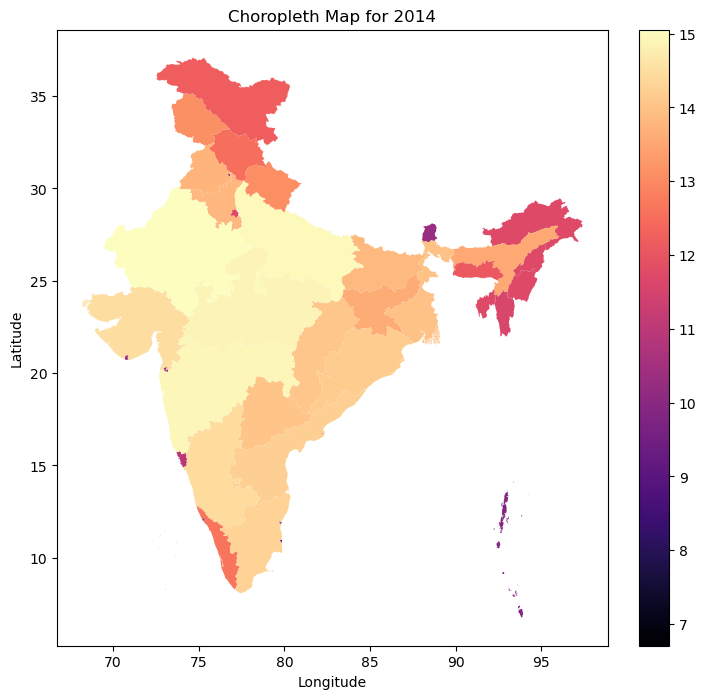

In [120]:
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Assuming gdf_lnNTL is a GeoJSON file
# Read the GeoJSON file into a GeoDataFrame
gdf_lnNTL = gpd.read_file("E:/Projects/Projects - Loyal Analytics/gdf_lnNTL.geojson")

# Plot the choropleth map
fig, ax = plt.subplots(figsize=(10, 8))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)  # Add colorbar axis

# Plot the choropleth map
gdf_lnNTL.plot(column=str(START_YEAR), cmap="magma", legend=True, ax=ax, cax=cax)

# Customize the plot
ax.set_title(f"Choropleth Map for {START_YEAR}")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Show the map
plt.show()

In [121]:
import folium
import geopandas as gpd

# Assuming gdf_lnNTL is a GeoJSON file
# Read the GeoJSON file into a GeoDataFrame
gdf_lnNTL = gpd.read_file("E:/Projects/Projects - Loyal Analytics/gdf_lnNTL.geojson")

# Create a Folium map centered around a location
m = folium.Map(location=[0, 0], zoom_start=2)

# Convert GeoDataFrame to GeoJSON
geojson_data = gdf_lnNTL.to_json()

# Add the choropleth layer to the map
folium.Choropleth(
    geo_data=geojson_data,
    name='choropleth',
    data=gdf_lnNTL,
    columns=['name', str(START_YEAR)],
    key_on='feature.properties.name',
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name=f"Choropleth Map for {START_YEAR}"  # Include start year in the legend name
).add_to(m)

# Add a LayerControl to the map
folium.LayerControl().add_to(m)

# Update the map title to include the start year
title_html = f"""
<div style="font-size: 20px; color: blue;"><b>Distribution of (log) NTL {START_YEAR}</b></div>
"""
m.get_root().html.add_child(folium.Element(title_html))

# Show the map
m

In [122]:
import folium
import geopandas as gpd

# Assuming gdf_lnNTL is a GeoJSON file
# Read the GeoJSON file into a GeoDataFrame
gdf_lnNTL = gpd.read_file("E:/Projects/Projects - Loyal Analytics/gdf_lnNTL.geojson")

# Create a Folium map centered around a location
m = folium.Map(location=[0, 0], zoom_start=2)

# Convert GeoDataFrame to GeoJSON
geojson_data = gdf_lnNTL.to_json()

# Add the choropleth layer to the map
folium.Choropleth(
    geo_data=geojson_data,
    name='choropleth',
    data=gdf_lnNTL,
    columns=['name', str(END_YEAR)],
    key_on='feature.properties.name',
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name=f"Choropleth Map for {END_YEAR}"  # Include start year in the legend name
).add_to(m)

# Add a LayerControl to the map
folium.LayerControl().add_to(m)

# Update the map title to include the start year
title_html = f"""
<div style="font-size: 20px; color: blue;"><b>Distribution of (log) NTL {END_YEAR}</b></div>
"""
m.get_root().html.add_child(folium.Element(title_html))

# Show the map
m

In [123]:
# The explore function of geopandas creates an interactive choroplet map of log GDP

import folium
import geopandas as gpd


# Create a Folium map centered around a location
m = folium.Map(location=[0, 0], zoom_start=2)

# Convert GeoDataFrame to GeoJSON
geojson_data = gdf_lnGSDP.to_json()

# Add the choropleth layer to the map
folium.Choropleth(
    geo_data=geojson_data,
    name='choropleth',
    data=gdf_lnNTL,
    columns=['name', str(START_YEAR)],
    key_on='feature.properties.name',
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name=f"Choropleth Map for {START_YEAR}"  # Include start year in the legend name
).add_to(m)

# Add a LayerControl to the map
folium.LayerControl().add_to(m)

# Update the map title to include the start year
title_html = f"""
<div style="font-size: 20px; color: blue;"><b>Distribution of (log) GDP {START_YEAR}</b></div>
"""
m.get_root().html.add_child(folium.Element(title_html))

# Show the map
m


In [127]:
# The explore function of geopandas creates an interactive choroplet map of log GDP

import folium
import geopandas as gpd

# Assuming gdf_lnNTL is a GeoJSON file
# Read the GeoJSON file into a GeoDataFrame
# gdf_lnNTL = gpd.read_file("E:/Projects/Projects - Loyal Analytics/df_lnGSD.geojson")

# Create a Folium map centered around a location
m = folium.Map(location=[0, 0], zoom_start=2)

# Convert GeoDataFrame to GeoJSON
geojson_data = gdf_lnGSDP.to_json()

# Add the choropleth layer to the map
folium.Choropleth(
    geo_data=geojson_data,
    name='choropleth',
    data=gdf_lnGSDP,
    columns=['name', str(END_YEAR)],
    key_on='feature.properties.name',
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name=f"Choropleth Map for {END_YEAR}"  # Include start year in the legend name
).add_to(m)

# Add a LayerControl to the map
folium.LayerControl().add_to(m)

# Update the map title to include the start year
title_html = f"""
<div style="font-size: 20px; color: blue;"><b>Distribution of (log) GDP {END_YEAR}</b></div>
"""
m.get_root().html.add_child(folium.Element(title_html))

# Show the map
m



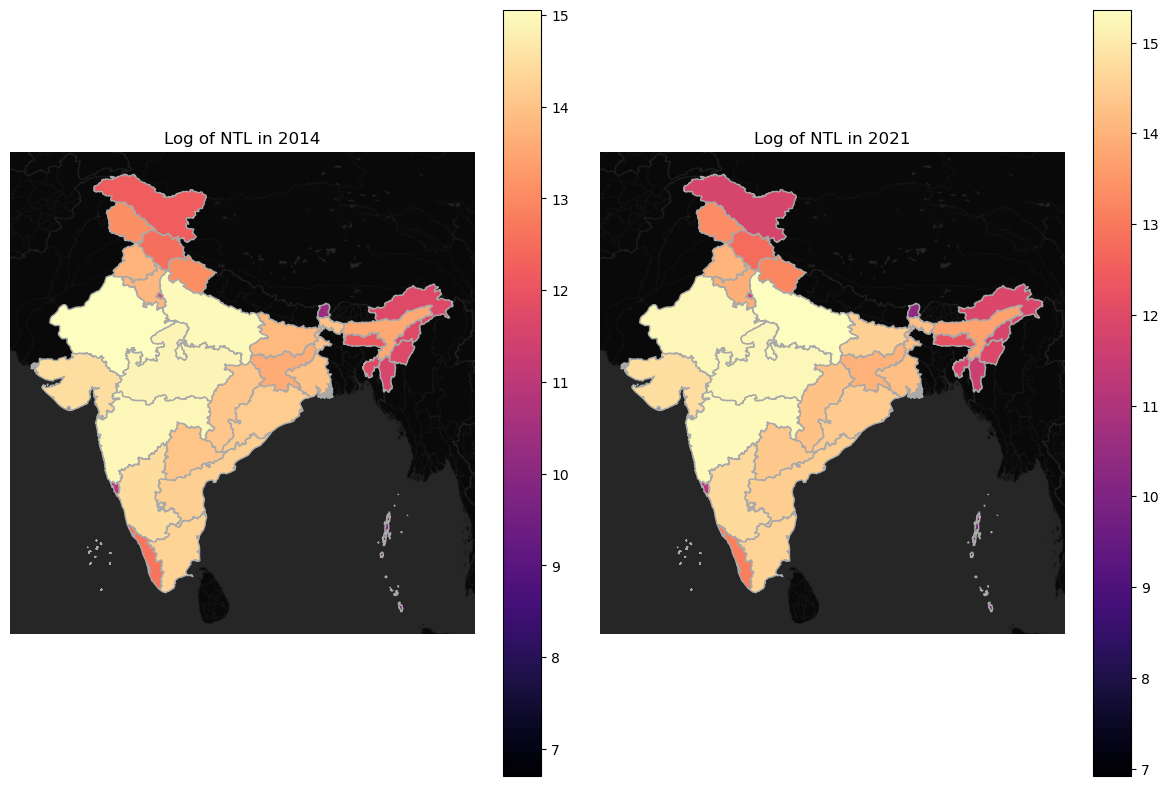

In [125]:
import matplotlib.pyplot as plt
import contextily as cx

# Static plot of (log) NTL for the initial and final year

# A figure is initialized
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

# Plot the start year
gdf_lnNTL.plot(
    column=str(START_YEAR),
    cmap="magma",
    edgecolor="darkgrey",
    legend=True,
    ax=axes[0],
)
cx.add_basemap(
    ax=axes[0],
    crs=gdf_lnNTL.crs.to_string(),
    source=cx.providers.CartoDB.DarkMatterNoLabels,
    attribution=False,
)

# Plot the end year
gdf_lnNTL.plot(
    column=str(END_YEAR),
    cmap="magma",
    edgecolor="darkgrey",
    legend=True,
    ax=axes[1],
)
cx.add_basemap(
    ax=axes[1],
    crs=gdf_lnNTL.crs.to_string(),
    source=cx.providers.CartoDB.DarkMatterNoLabels,
    attribution=False,
)

# Customize the plot
for ax, year in zip(axes, [START_YEAR, END_YEAR]):
    ax.set_title(f"Log of NTL in {year}")
    ax.set_axis_off()

# Save the plot
plt.tight_layout()
# plt.savefig("figures/fig_map_lnNTL.png", dpi=300, bbox_inches="tight")
plt.show()



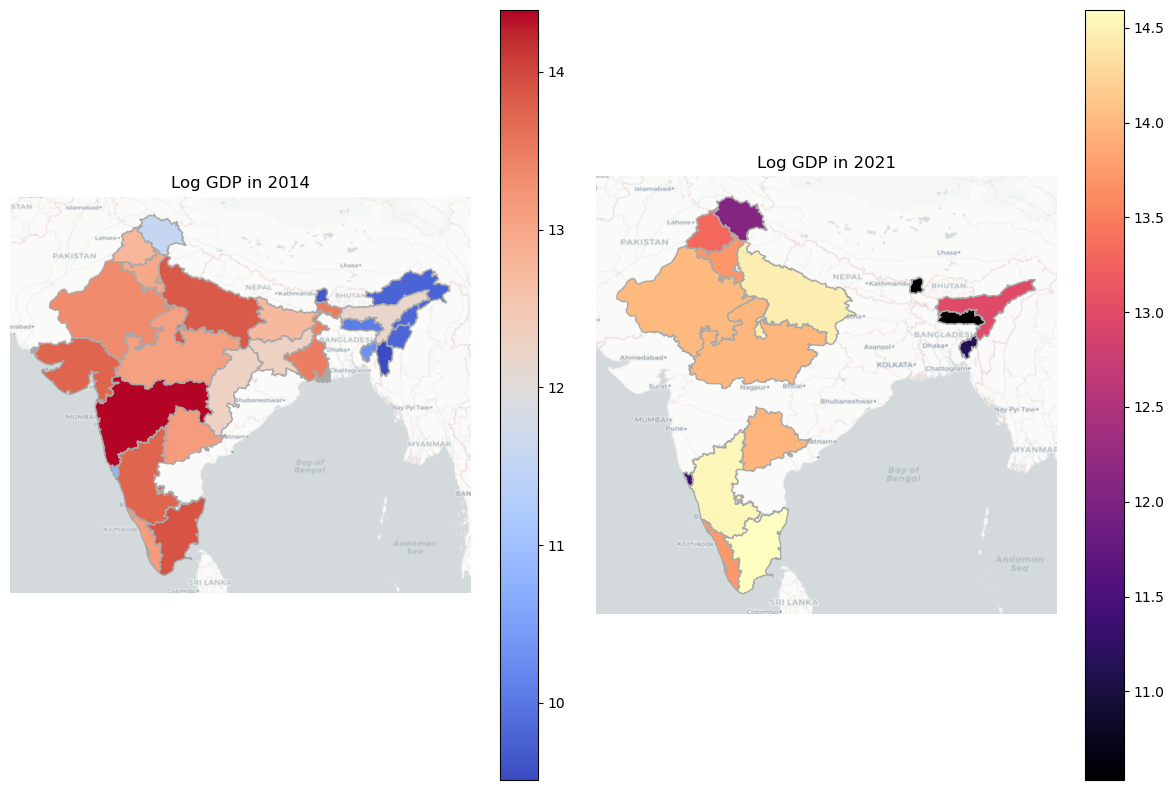

In [126]:
import matplotlib.pyplot as plt
import contextily as cx

# Static plot of (log) GDP for the initial and final year

# A figure is initialized
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

# Plot for the start year is added
gdf_lnGSDP.plot(
    column=str(START_YEAR),
    cmap="coolwarm",
    edgecolor="darkgrey",
    legend=True,
    ax=axes[0],
)
cx.add_basemap(
    ax=axes[0],
    crs=gdf_lnGSDP.crs.to_string(),
    source=cx.providers.CartoDB.Positron,
    attribution=False,
)

# Plot for the end year is added
gdf_lnGSDP.plot(
    column=str(END_YEAR),
    cmap="magma",
    edgecolor="darkgrey",
    legend=True,
    ax=axes[1],
)
cx.add_basemap(
    ax=axes[1],
    crs=gdf_lnGSDP.crs.to_string(),
    source=cx.providers.CartoDB.Positron,
    attribution=False,
)

# Customize the plot
for ax, year in zip(axes, [START_YEAR, END_YEAR]):
    ax.set_title(f"Log GDP in {year}")
    ax.set_axis_off()

# Save the plot
plt.tight_layout()
#plt.savefig("figures/fig_map_lnGDP.png", dpi=300, bbox_inches="tight")
plt.show()



###  Regional time series

In [148]:
# Regional time series of (log) nighttime lights
fig_ts_lnNTL = px.line(merged_df, x="name", y="NTL", color="name")
fig_ts_lnNTL.show(renderer="colab")

In [149]:
# Regional time series of log GDP using Plotly.
import plotly.io as px
import plotly.graph_objects as go
import plotly.express as px

fig_ts_lnGDP = px.line(df, x="name", y="GSDP", color="name")
fig_ts_lnGDP.show(renderer="colab")
